In [1]:
print("Hello World")

Hello World


In [2]:
from time import sleep
from lab_devices import devices
from numpy import linspace

devs = devices()
duck = devs['Duck']
dmm = devs['DMM 1']
lockin = devs['Lockin 1']

Cannot Initiate device Duck(MAC) : could not open port '/dev/tty.usbmodem1421': FileNotFoundError(2, 'The system cannot find the path specified.', None, 3)




In [22]:
dmm.set_DCV()
duck.set_ramp_rate(0.5)
duck.set_AC(0,.3)
duck.set_DC(0,0)
duck.set_AC(1,1)

In [20]:
index = linspace(0,10,50)
res = [] 
for value in index:
    duck.set_DC(0, value)
    sleep(2)
    res.append([dmm.current_value, lockin.x])
    print(res[-1])

[-0.042899384, 0.283907]
[0.248019996, 0.283541]
[0.361880096, 0.283815]
[0.650326796, 0.283815]
[0.770550905, 0.283449]
[1.05858844, 0.28351]
[1.1712599, 0.283846]
[1.46928815, 0.283907]
[1.63514781, 0.28351]
[1.87957928, 0.283754]
[2.08566231, 0.283937]
[2.18116019, 0.283907]
[2.4667912, 0.283693]
[2.59963699, 0.283968]
[2.78874321, 0.284121]
[3.05475814, 0.283724]
[3.24585712, 0.283907]
[3.41821297, 0.284212]
[3.73399349, 0.28409]
[3.7832683, 0.284121]
[4.14749164, 0.284365]
[4.19022993, 0.284426]
[4.49492669, 0.284121]
[4.61526633, 0.284151]
[4.92435467, 0.284456]
[5.05595375, 0.284639]
[5.36986051, 0.284822]
[5.38690214, 0.284639]
[5.73102417, 0.284609]
[5.78157757, 0.285067]
[5.9872347, 0.285006]
[6.39923073, 0.285006]
[6.45612284, 0.285341]
[6.59165923, 0.285433]
[6.96803118, 0.285128]
[7.24395963, 0.285311]
[7.18768197, 0.285769]
[7.63918621, 0.285891]
[7.78545607, 0.285769]
[8.045106, 0.285769]
[8.07434115, 0.286165]
[8.42834003, 0.286318]
[8.40090514, 0.285982]
[8.88143417, 0

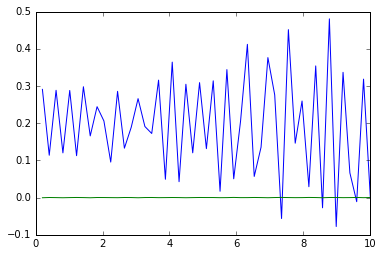

In [21]:
from pandas import DataFrame
%matplotlib inline
df = DataFrame(res,columns=['dmm','lockin'], index = index)
df.dmm.diff().plot()
df.lockin.diff().plot()

In [40]:
lockin.x

0.298647

In [41]:
dmm.current_value

-0.0432236074

In [42]:
duck.set_DC(0, 1)

In [43]:
dmm.current_value

1.0223971

In [44]:
devs.close()

Closed Device : Duck
Closed Device : DMM 1
Closed Device : Lockin 1
